In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,ID,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Contact,Year,Status,EngineCar,Capacity,Trademark,ProductionYear
0,4283282,Nhập khẩu,Crossover,0,Trắng,Đen,5,5,Số tự động,620,Hà Nội,934372868.0,2022,mới,Xăng,1.5,Hyundai,2022
1,3834381,Lắp ráp trong nước,SUV,0,Trắng,Nâu,5,7,Số tự động,1240,Hà Nội,934372868.0,2022,mới,Xăng,2.5,Hyundai,2022
2,4259125,Lắp ráp trong nước,SUV,20000,Đỏ,Nâu,5,7,Số tự động,1048,Hà Nội,913220619.0,2019,cũ,Xăng,2.5,Mazda,2019
3,4350001,Nhập khẩu,Crossover,36000,Trắng,Kem,5,5,Số tự động,725,Hà Nội,913220619.0,2015,cũ,Xăng,2.0,Hyundai,2015
4,4211247,Nhập khẩu,Crossover,60000,Bạc,Ghi,5,5,Số tự động,518,Hà Nội,913220619.0,2009,cũ,Xăng,2.7,Toyota,2009


In [3]:
cars.shape

(1974, 18)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1974 non-null   int64  
 1   Assemble        1974 non-null   object 
 2   Type            1974 non-null   object 
 3   Km              1974 non-null   int64  
 4   CarColor        1974 non-null   object 
 5   InteriorColor   1974 non-null   object 
 6   CarDoor         1974 non-null   int64  
 7   CarSeat         1974 non-null   int64  
 8   Gearbox         1974 non-null   object 
 9   Price           1974 non-null   int64  
 10  Location        1974 non-null   object 
 11  Contact         1974 non-null   float64
 12  Year            1974 non-null   int64  
 13  Status          1974 non-null   object 
 14  EngineCar       1974 non-null   object 
 15  Capacity        1974 non-null   float64
 16  Trademark       1974 non-null   object 
 17  ProductionYear  1974 non-null   i

# Visualing data 


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


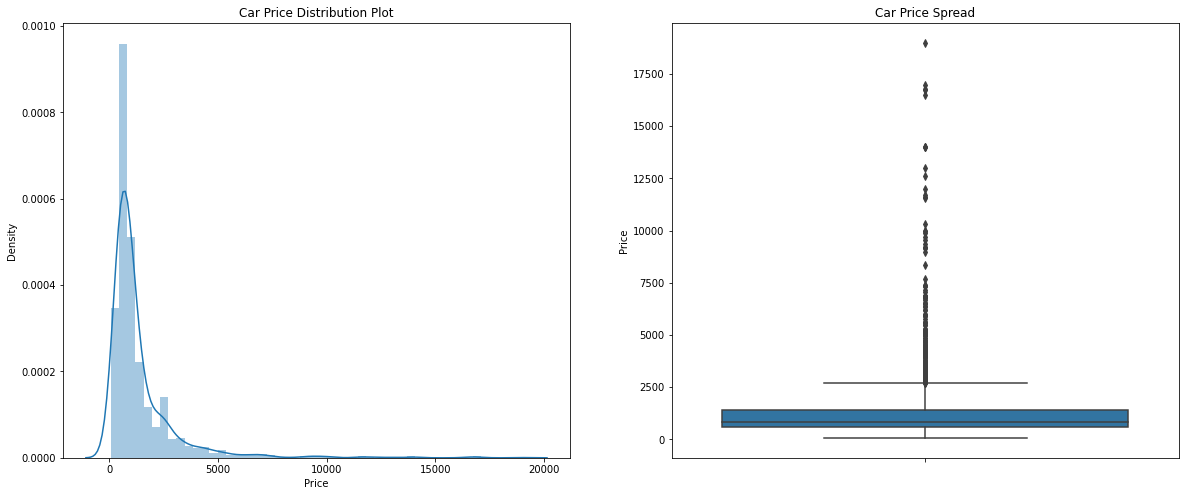

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

Giá hầu như bị lệch phải, giá toàn bộ xe oto có trong dataset đều dưới 5 tỷ đồng.

Các Categorical Data:
---
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

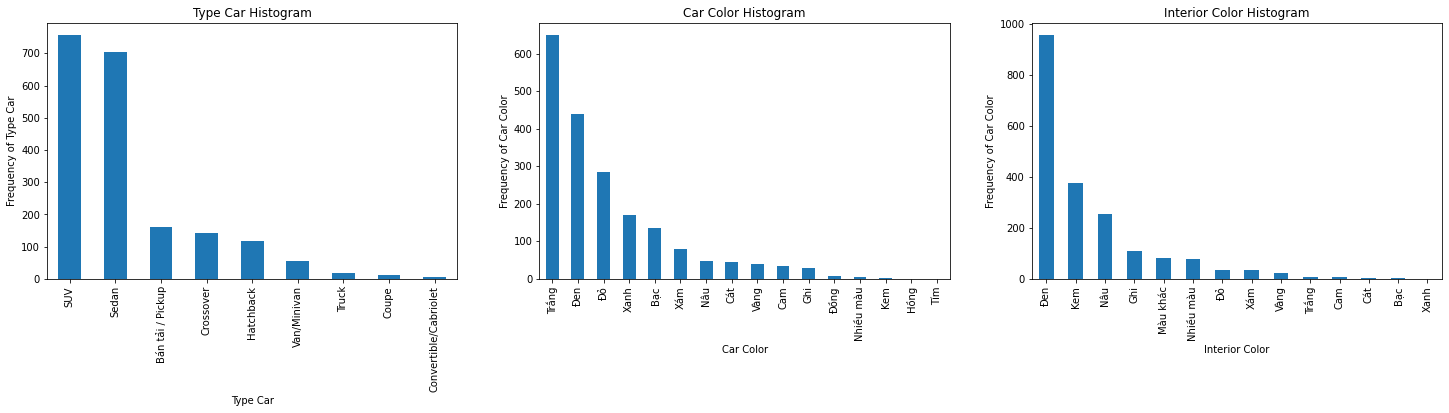

In [6]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(332)
plt1 = cars.CarColor.value_counts().plot(kind = 'bar')
plt.title('Car Color Histogram')
plt1.set(xlabel = 'Car Color', ylabel='Frequency of Car Color')

plt.subplot(333)
plt1 = cars.InteriorColor.value_counts().plot(kind = 'bar')
plt.title('Interior Color Histogram')
plt1.set(xlabel = 'Interior Color', ylabel='Frequency of Car Color')

plt.show()

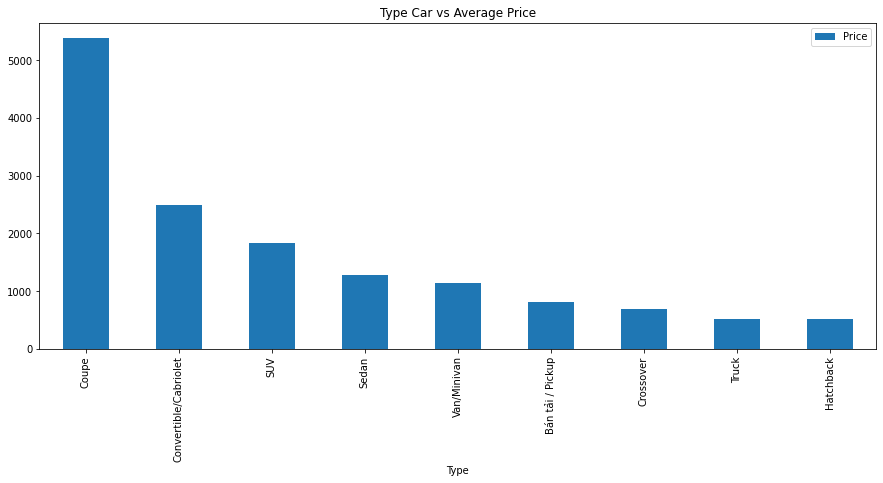

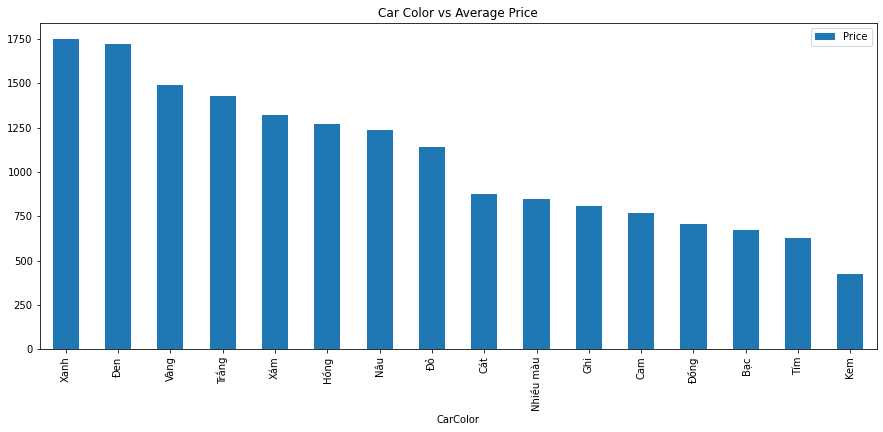

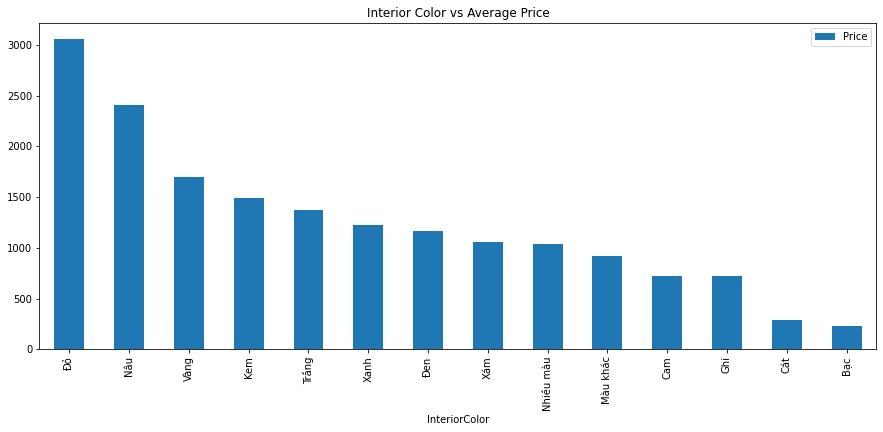

In [7]:
df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Type Car vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['CarColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Car Color vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['InteriorColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Interior Color vs Average Price')
plt.show()

KL:
1. SUV là loại xe được ưa chuộng nhiều nhất.
2. Màu xe trắng là màu được đăng bán nhiều nhất, nhưng mức giá của màu ô tô xám là cao nhất.
3. Màu nội thắng màu đen được ưa chuộng nhiều nhất, nhưng mức giá của màu đỏ là cao nhất.

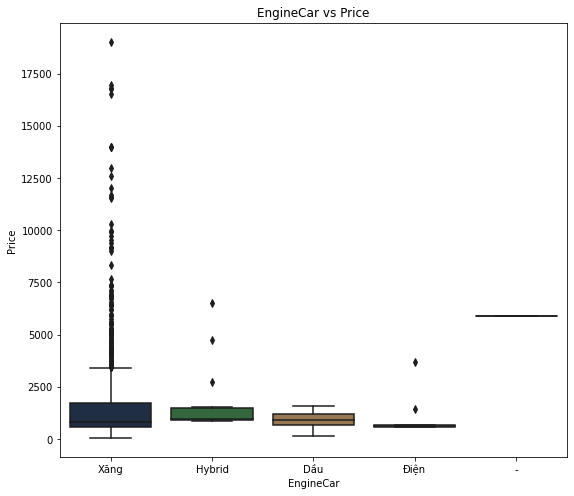

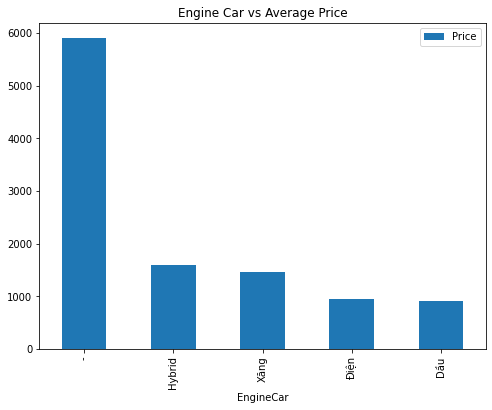

In [8]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
plt.title('EngineCar vs Price')
sns.boxplot(x=cars.EngineCar, y=cars.Price, palette=("cubehelix"))

df = pd.DataFrame(cars.groupby(['EngineCar'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Car vs Average Price')
plt.show()
plt.show()




 Kết luận:
- Loại xe chạy bằng nhiên liệu xăng được ưa chuộng nhiều nhất, sau đó đến dầu.
- Xe chạy bằng xăng cũng có mức giá bán cao nhất trong các loại.
- Hybrid cũng là loại nhiên liệu có mức giá cao, nên không được chuộng.

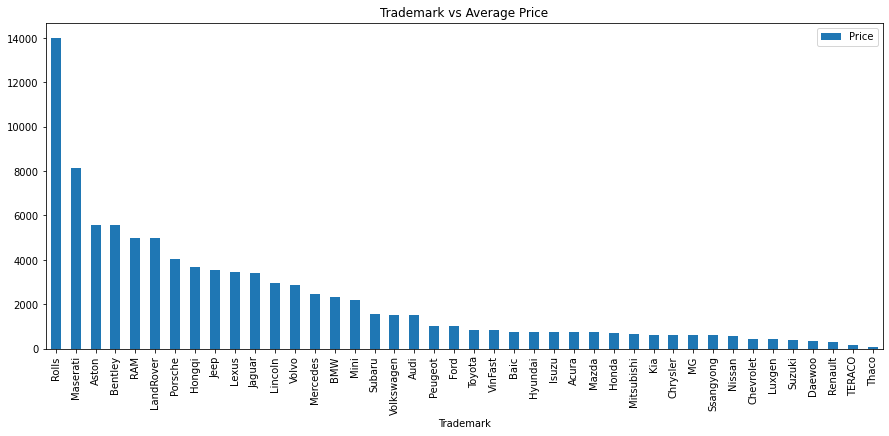

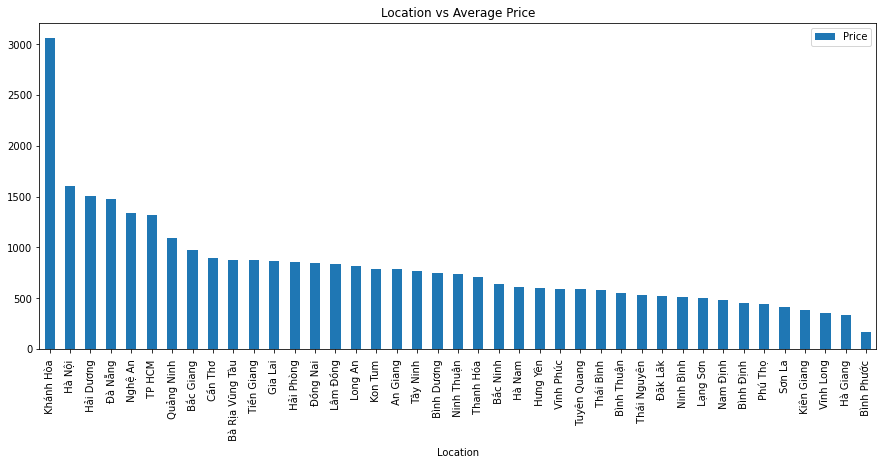

In [9]:


df = pd.DataFrame(cars.groupby(['Trademark'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))

plt.title('Trademark vs Average Price')
plt.show()


df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Location vs Average Price')
plt.show()


Kết luận:
- Dòng xe của hãng Rolls Royce có mức giá rất cao.
- Tỉnh Khánh Hòa là nơi có mức giá bán xe cao nhất.
- Đà Nẵng - Hà Nội - HCM là 3 nơi có mức giá bán cao ngang nhau sau tỉnh Khánh Hòa. Trong khi các nơi khác mức giá không chênh lệch nhiều.

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

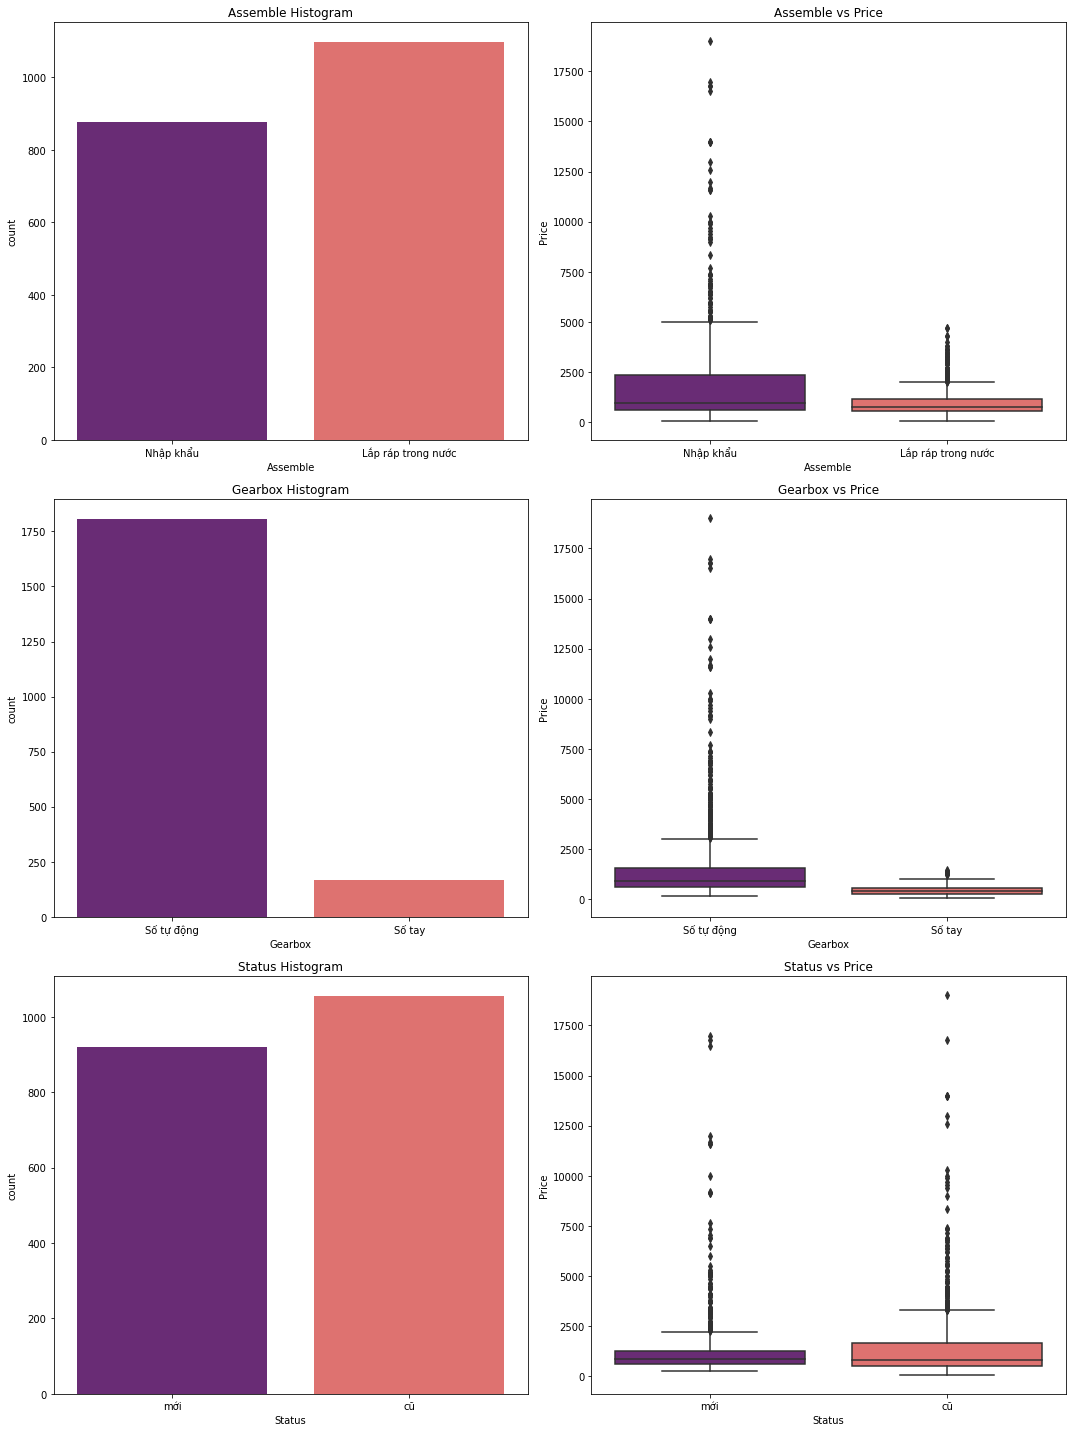

In [10]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Assemble', 1)
plot_count('Gearbox', 3)
plot_count('Status', 5)


plt.tight_layout()

Kết luận:
- Loại xe nhập khẩu có mức giá bán cao hơn loại lắp ráp trong nước. Nên loại lắp ráp trong nước được nhiều người bán hơn.
- Hiện này xe số tự động được ưa chuộng và có giá bán cao hơn loại số tay.
- Loại xe mới hoặc cũ không ảnh hưởng quá nhiều tới giá xe. 
- Có thể thấy rõ không có nhiều sự khác biệt giữa 2 loại này. Dù vẫn có ngoại lệ ở loại xe cũ nhưng không đáng kể.


Numeric Data
---
- Km
- CarDoor
- CarSeat
- Capacity
- ProductionYear

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


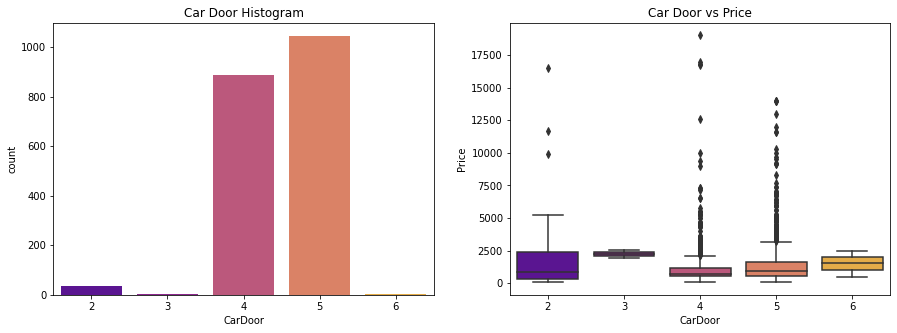

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


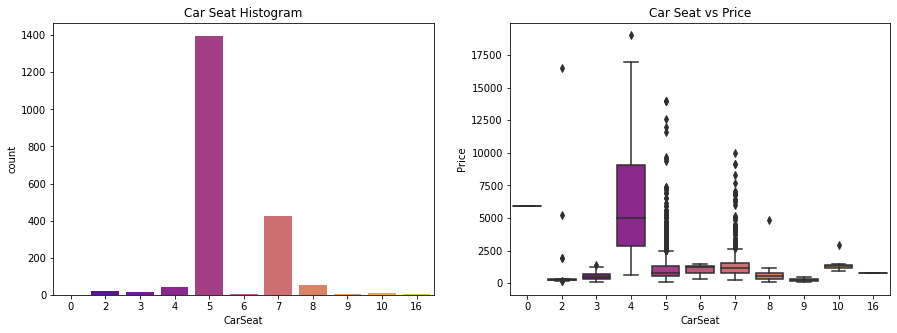

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Door Histogram')
sns.countplot(cars.CarDoor, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Door vs Price')
sns.boxplot(x=cars.CarDoor, y=cars.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Seat Histogram')
sns.countplot(cars.CarSeat, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Seat vs Price')
sns.boxplot(x=cars.CarSeat, y=cars.Price, palette=("plasma"))

plt.show()

Kết luận:
- Số lượng xe 4 và 5 cửa được ưa chuộng nhiều nhất. Dù loại xe 3 và 6 cửa không được chuộng nhưng có tầm giá bán cao nhất trong các loại.
- Loại chỗ 5 và 7 được ưa chuộng nhiều nhất. Tuy nhiên loại xe 4 chỗ ngồi lại có tầm giá cao nhất.

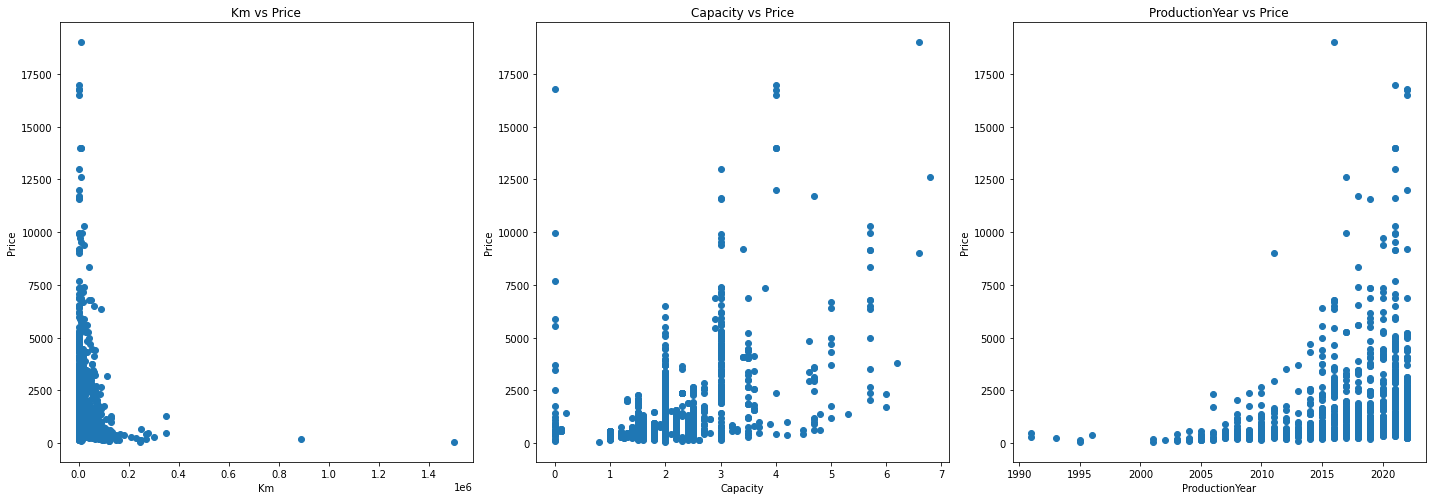

In [12]:
def scatter(x,fig):
    plt.subplot(3,3,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Km', 1)
scatter('Capacity', 2)
scatter('ProductionYear', 3)



plt.tight_layout()

Kết luận:
- Số km đã chạy của ô tô ảnh hưởng tiêu cực tới giá tiền.
- Giá xe bán qua từng năm có sự tương quan tích cực tới giá tiền, đặc biệt từ khoảng năm 2015 đến nay.
- Dung tích xăng cũng không có ý nghĩa quá nhiều tới giá tiền của 1 xe.

Các đặc trưng có ảnh hưởng tới giá tiền (Price) sau khi đã trực quan hóa dữ liệu:
---

- Km
- ProductionYear
- CarColor
- CarSeat
- CarType
- CarDoor
- EngineCar
- Gearbox
- Assemble

In [13]:
cars_lr = cars[['Price','Km', 'ProductionYear','CarColor', 'CarSeat','CarDoor', 'Type',
                  'EngineCar', 'Gearbox', 'Assemble']]
cars_lr.head()

,Price,Km,ProductionYear,CarColor,CarSeat,CarDoor,Type,EngineCar,Gearbox,Assemble
0,620,0,2022,Trắng,5,5,Crossover,Xăng,Số tự động,Nhập khẩu
1,1240,0,2022,Trắng,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước
2,1048,20000,2019,Đỏ,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước
3,725,36000,2015,Trắng,5,5,Crossover,Xăng,Số tự động,Nhập khẩu
4,518,60000,2009,Bạc,5,5,Crossover,Xăng,Số tự động,Nhập khẩu


In [14]:
cars_lr = pd.get_dummies(cars_lr)

In [15]:
cars_lr.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,CarColor_Bạc,CarColor_Cam,CarColor_Cát,CarColor_Ghi,CarColor_Hồng,...,Type_Van/Minivan,EngineCar_-,EngineCar_Dầu,EngineCar_Hybrid,EngineCar_Xăng,EngineCar_Điện,Gearbox_Số tay,Gearbox_Số tự động,Assemble_Lắp ráp trong nước,Assemble_Nhập khẩu
0,620,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,1240,0,2022,7,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1048,20000,2019,7,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,725,36000,2015,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,518,60000,2009,5,5,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars_lr,  train_size = 0.8, test_size = 0.2)

In [17]:
df_train = pd.get_dummies(df_train)
df_train.shape
df_train.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,CarColor_Bạc,CarColor_Cam,CarColor_Cát,CarColor_Ghi,CarColor_Hồng,...,Type_Van/Minivan,EngineCar_-,EngineCar_Dầu,EngineCar_Hybrid,EngineCar_Xăng,EngineCar_Điện,Gearbox_Số tay,Gearbox_Số tự động,Assemble_Lắp ráp trong nước,Assemble_Nhập khẩu
1349,1660,65000,2017,5,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1928,1327,0,2022,7,5,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1855,774,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1520,2099,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
479,1340,0,2021,7,5,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [18]:
df_test = pd.get_dummies(df_test)
df_test.shape
df_test.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,CarColor_Bạc,CarColor_Cam,CarColor_Cát,CarColor_Ghi,CarColor_Hồng,...,Type_Van/Minivan,EngineCar_-,EngineCar_Dầu,EngineCar_Hybrid,EngineCar_Xăng,EngineCar_Điện,Gearbox_Số tay,Gearbox_Số tự động,Assemble_Lắp ráp trong nước,Assemble_Nhập khẩu
1460,990,0,2022,5,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1037,1271,0,2022,7,5,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1285,616,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1391,589,23500,2020,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
200,546,0,2014,8,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


# Outlier Handling


### Khảo sát

<AxesSubplot:>

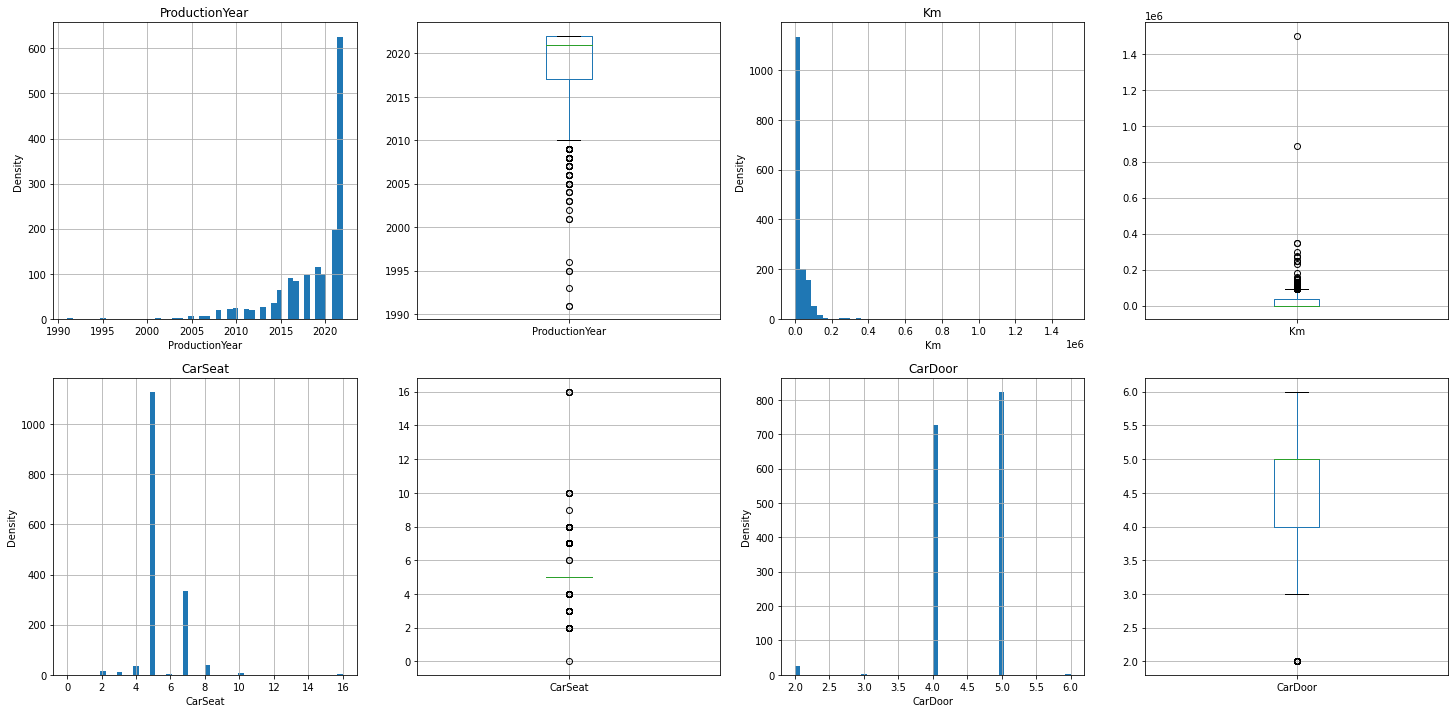

In [19]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=df_train.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="Km")

plt.subplot(2,4,5)
figure=df_train.CarSeat.hist(bins=50)
figure.set_title('CarSeat')
figure.set_xlabel('CarSeat')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="CarSeat")

plt.subplot(2,4,7)
figure=df_train.CarDoor.hist(bins=50)
figure.set_title('CarDoor')
figure.set_xlabel('CarDoor')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="CarDoor")



Kết luận:
- Có thể thấy đặc trưng ProductionYear có nhiều giá trị ngoại lệ lệch dưới và đặc trưng Km cũng có nhiều giá trị ngoại lệ lệch trên.
- Trong khi đó đặc trưng CarSeat và CarDoor không có nhiều giá trị ngoại lệ.

=> Nên ta xử lý ngoại lệ cho 2 đặc trưng ProductionYear và Km.


### Áp dụng xử lý ngoại lệ

In [20]:
cars_outlier = df_train.copy()

#Km
IQR = cars_outlier.Km.quantile(0.75)-cars_outlier.Km.quantile(0.25)
# lower_bridge=cars_outlier['Km'].quantile(0.25)-(IQR*3)
upper_bridge = cars_outlier['Km'].quantile(0.75)+(IQR*3)

cars_outlier.loc[cars_outlier['Km'] >= round(upper_bridge), 'Km'] = round(upper_bridge)

#ProductionYear
IQR = cars_outlier.ProductionYear.quantile(0.75) - cars_outlier.ProductionYear.quantile(0.25)
lower_bridge = cars_outlier['ProductionYear'].quantile(0.25)-(IQR*3)
cars_outlier.loc[cars_outlier['ProductionYear'] < round(lower_bridge), 'ProductionYear'] = round(lower_bridge)


### Kết quả xử lý ngoại lệ

<AxesSubplot:>

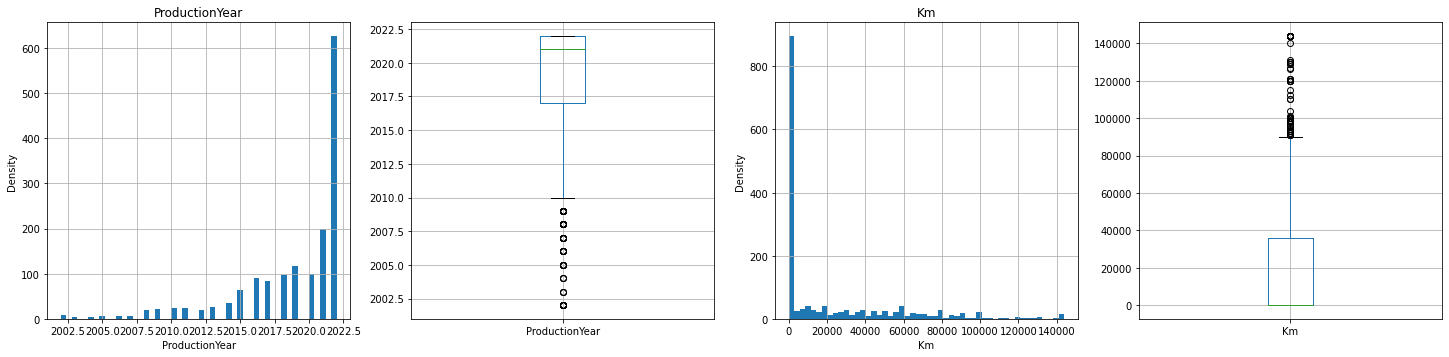

In [21]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=cars_outlier.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
cars_outlier.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=cars_outlier.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
cars_outlier.boxplot(column="Km")

-> Một số giá trị lệch quá cao và quá thấp đã được xử lý, mặc dù vẫn còn nhiều giá trị nằm ngoài mức phân bố.

# Dummy Encoding

In [129]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_outlier

cars_outlier = dummies('CarColor',cars_outlier)
cars_outlier = dummies('Type',cars_outlier)
cars_outlier = dummies('EngineCar',cars_outlier)
cars_outlier = dummies('Gearbox',cars_outlier)
cars_outlier = dummies('Assemble',cars_outlier)


In [130]:
cars_outlier.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,Cam,Cát,Ghi,Kem,Nhiều màu,...,SUV,Sedan,Truck,Van/Minivan,Dầu,Hybrid,Xăng,Điện,Số tự động,Nhập khẩu
250,1450,26000,2017,5,5,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
394,1570,6000,2022,7,5,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1152,435,0,2021,5,4,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
172,925,0,2022,5,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
136,534,0,2022,5,4,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [163]:
cars_outlier=pd.get_dummies(cars_outlier)
cars_outlier.head()

,Price,Km,ProductionYear,CarSeat,CarDoor,CarColor_Bạc,CarColor_Cam,CarColor_Cát,CarColor_Ghi,CarColor_Hồng,...,Type_Van/Minivan,EngineCar_-,EngineCar_Dầu,EngineCar_Hybrid,EngineCar_Xăng,EngineCar_Điện,Gearbox_Số tay,Gearbox_Số tự động,Assemble_Lắp ráp trong nước,Assemble_Nhập khẩu
461,1412,0,2022,7,5,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
423,1060,80000,2012,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
993,1411,0,2022,7,5,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1750,595,15600,2018,5,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
415,4400,0,2020,5,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [164]:
cars_outlier.shape

(1579, 38)

In [165]:
df_test = pd.get_dummies(df_test)

In [166]:
df_test.shape

(395, 34)

# Chia tập Train / Test và chuẩn hóa dữ liệu 
    


In [135]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(cars_outlier,  train_size = 0.8, test_size = 0.2)

# X_train = df_train.copy()
# X_test = df_test.copy()

# print("X_train: {0}".format(X_train.shape))
# print("X_test: {0}".format(X_test.shape))



In [136]:
# #Correlation using heatmap
# plt.figure(figsize = (25, 25))
# sns.heatmap(X_train.corr(), annot = True)
# plt.show()

In [22]:
y_train = cars_outlier.pop("Price")
y_test = df_test.pop("Price")

In [143]:
df_test.head()
df_test.shape
#cars_outlier.shape

(395, 35)

# Chuẩn hóa dữ liệu

**Robust Scaler**

In [23]:
def robust(df):
    ### dùng RobustScaler from sklearn library
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return df_scaled

In [74]:
cars_scaler = robust(cars_outlier)

# Xây dựng Model (RandomForestRegressor)

In [153]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(cars_outlier, y_train)

RandomForestRegressor(random_state=123)

In [154]:
predictions = model_RD.predict(df_test)

In [155]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1021.8839827569868

Siêu tham số

In [123]:
from ensurepip import bootstrap
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'bootstrap' : [True, False]
}
bootstrap = ['True', 'False']
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [138]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2)
# Fit the grid search to the data
grid_fit = grid_search.fit(cars_outlier, y_train)
best_parameters = grid_fit.best_params_
best_parameters

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

Sau siêu tham số

In [139]:
model_RD = RandomForestRegressor(random_state=123, n_estimators=100, bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=8)
model_RD.fit(cars_outlier, y_train)
predictions = model_RD.predict(df_test)

In [141]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(metrics.mean_squared_error(y_test, predictions))


992.8114042317362

In [142]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(metrics.mean_squared_error(y_test, predictions))


992.8114042317362

In [143]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
kfold = kfold.split(cars_outlier, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(cars_outlier.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(cars_outlier.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 1128.6895530254276
Fold: 1 : rmse = 1507.7529042624255
Fold: 2 : rmse = 1066.6153297639958
Fold: 3 : rmse = 1077.680933568403
Fold: 4 : rmse = 1769.7162018246054
Fold: 5 : rmse = 1291.730936401968
Fold: 6 : rmse = 1466.8748250609415
Fold: 7 : rmse = 1486.0070280382877
Fold: 8 : rmse = 1009.8421101908978
Fold: 9 : rmse = 1781.4335039135283


Cross-Validation:
 mean 1358.634332605048 
 std: 272.23890052101257


In [149]:
from sklearn.linear_model import LinearRegression


model_LR = LinearRegression()
model_LR.fit(cars_outlier, y_train)

LinearRegression()

In [150]:
predictions = model_LR.predict(df_test)

In [151]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))

1253.462622651003

In [152]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
kfold = kfold.split(cars_outlier, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_LR.fit(cars_outlier.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(cars_outlier.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 1043.4707504619846
Fold: 1 : rmse = 1375.870183731441
Fold: 2 : rmse = 939.7476024935555
Fold: 3 : rmse = 1015.4323331091745
Fold: 4 : rmse = 1616.75034543342
Fold: 5 : rmse = 1212.4351555694584
Fold: 6 : rmse = 1275.132923668975
Fold: 7 : rmse = 1295.3592660451397
Fold: 8 : rmse = 940.960204519805
Fold: 9 : rmse = 1781.4335039135283


Cross-Validation:
 mean 1249.659226894648 
 std: 269.50106453713875
